In [60]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('max_colwidth', 50)
# set this if you need to

In [35]:
def get_date(s1):
    year = s1[:4]
    month = s1[4:6]
    day = s1[-2:]
    return '{0}-{1}-{2}'.format(year, month, day)

In [41]:
get_date('20142310')

'2014-23-10'

In [36]:
def get_month(s2):
    month = s2[4:6]
    return month


In [38]:
get_month('20161015')

'10'

In [33]:
#restaurant_scores['month'] = restaurant_scores['date'].map(get_month)

NameError: name 'df' is not defined

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [43]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.tail()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
7539,87165,The Rainbow,4401 18th St,SF,94114,NaN,NaN,+14155822018,H07,NaN,03/30/2016,Samer Jubrail Soudah,403 Hall St.,San Carlos,CA,94070
7540,87200,Hot Dog Bills,599 Skyline Blvd #1 Lakeside,SF,94132,NaN,NaN,+14150874301,H26,NaN,04/01/2016,Hot Dog Bills Inc,675 Santa Barbara Ave.,Millbrae,CA,94031
7541,87201,Oolong Noodles Restaurant,646 Washington St,NaN,94111,NaN,NaN,NaN,H26,1029660.0,04/01/2016,Hung Dat Lai,2687 Mission Street,San Francisco,CA,94110
7542,87202,Hot Dog Bills,599 Skyline Blvd #2 Driving Range,SF,94132,NaN,NaN,+14150874301,H26,301235.0,04/01/2016,Hot Dog Bills Inc,675 Santa Barbara Ave.,Millbrae,CA,94031
7543,87213,India Palace Restaurant,1740 Fillmore St,SF,94115,NaN,NaN,+14155567789,H25,1027523.0,04/01/2016,Bella Foods Inc,1740 Fillmore St.,SF,CA,94115


In [44]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [45]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [46]:
part1 = pd.merge(inspections, violations, how='left', on=('business_id', 'date'))

restaurant_scores = pd.merge(part1, businesses, how ='left', on = ('business_id'))
restaurant_scores.head()

#1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html


,business_id,Score,date,type,ViolationTypeID,risk_category,description,name,address,city,...,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,NaN,20140807,Reinspection/Followup,NaN,NaN,NaN,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,10,94.0,20140729,Routine - Unscheduled,103129.0,Moderate Risk,Insufficient hot water or running water,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
2,10,94.0,20140729,Routine - Unscheduled,103144.0,Low Risk,Unapproved or unmaintained equipment or utensils,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
3,10,NaN,20140124,Reinspection/Followup,NaN,NaN,NaN,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
4,10,92.0,20140114,Routine - Unscheduled,103154.0,Low Risk,Unclean or degraded floors walls or ceilings,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104


In [47]:
# 2 Which ten business have had the most inspections?
restaurant_scores.name.value_counts().head(10)



Peet's Coffee & Tea           151
Starbucks Coffee              100
Whole Foods Market             97
Specialty's Cafe & Bakery      88
KENTUCKY FRIED CHICKEN         80
Lers Ros Thai Noodle           78
San Francisco Soup Company     74
King of Thai Noodle House      69
Cafe Bakery                    67
Yama Sushi Restaurant          66
Name: name, dtype: int64

In [48]:
# 3 Group and count the inspections by type
restaurant_scores.type.value_counts()

Routine - Unscheduled                42222
Reinspection/Followup                 6043
Complaint                             3155
New Ownership                         2665
New Construction                      1643
Non-inspection site visit             1008
Foodborne Illness Investigation        246
Complaint Reinspection/Followup        168
Structural Inspection                  142
Routine - Scheduled                    100
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

In [58]:
#restaurant_scores['date'] = get_date(restaurant_scores['date'])
#restaurant_scores.head()
restaurant_scores['month'] = [get_month(i.astype(str)) for i in restaurant_scores['date']]
restaurant_scores.head()

,business_id,Score,date,type,ViolationTypeID,risk_category,description,name,address,city,...,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip,month
0,10,NaN,20140807,Reinspection/Followup,NaN,NaN,NaN,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,08
1,10,94.0,20140729,Routine - Unscheduled,103129.0,Moderate Risk,Insufficient hot water or running water,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,07
2,10,94.0,20140729,Routine - Unscheduled,103144.0,Low Risk,Unapproved or unmaintained equipment or utensils,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,07
3,10,NaN,20140124,Reinspection/Followup,NaN,NaN,NaN,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,01
4,10,92.0,20140114,Routine - Unscheduled,103154.0,Low Risk,Unclean or degraded floors walls or ceilings,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,01


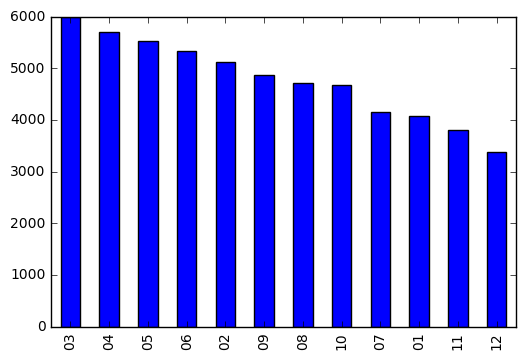

In [61]:
restaurant_scores.month.value_counts().plot(kind='bar')
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

In [79]:
# 5 Which zip code contains the most high risk violations?
#restaurant_scores.sort_index(by='team1score', inplace = True)
#restaurant_scores.sort(['A', 'B'], ascending=[1, 0])

restaurant_scores[restaurant_scores.risk_category=='High Risk'].postal_code.value_counts().head()



94133    618
94103    569
94110    556
94122    460
94109    459
Name: postal_code, dtype: int64

In [ ]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?



In [ ]:
# 7 Examining the descriptions, what is the most common violation?

In [ ]:
# 8 Create a hist of the scores with 10 bins

In [ ]:
# 9 Can you predict risk category based on the other features in this dataset?

In [ ]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [ ]:
############################
### A Little More Morbid ###
############################

In [66]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [ ]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

In [ ]:
# 2. Show the count of missing values in each column

In [ ]:
# 3. replace each null value in the dataframe with the string "Unknown"

In [ ]:
# 4. How many killings were there so far in 2015?

In [ ]:
# 5. Of all killings, how many were male and how many female?

In [ ]:
# 6. How many killings were of unarmed people?

In [ ]:
# 7. What percentage of all killings were unarmed?

In [ ]:
# 8. What are the 5 states with the most killings?

In [ ]:
# 9. Show a value counts of deaths for each race

In [ ]:
# 10. Display a histogram of ages of all killings

In [ ]:
# 11. Show 6 histograms of ages by race

In [ ]:
# 12. What is the average age of death by race?

In [ ]:
# 13. Show a bar chart with counts of deaths every month

In [ ]:
###################
### Less Morbid ###
###################

In [ ]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

In [ ]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

In [ ]:
# 2. Show the cout of missing values in each column

In [ ]:
# 3. What are the top 10 highest paying majors?

In [ ]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!

In [ ]:
# 5. What is the average median salary for each major category?

In [ ]:
# 6. Show only the top 5 paying major categories

In [ ]:
# 7. Plot a histogram of the distribution of median salaries

In [ ]:
# 8. Plot a histogram of the distribution of median salaries by major category

In [ ]:
# 9. What are the top 10 most UNemployed majors?

In [ ]:
# What are the unemployment rates?

In [ ]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

In [ ]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

In [ ]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"